In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.figure import Figure
import math
import imageio
import datetime
from os import walk
from scipy import stats

from ConvLSTM import ConvLSTM
from SlimAutoencoder import SlimAutoencoderBuilder
from rea_cd_autoencoder import REA_CD_Autoencoder
from dataloader import hillsborough_county_rea_cd_encoded as hc_rea_cd_encoded

import multiprocessing
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
sales_and_parcels = pd.read_pickle("/tf/DataSources/sales_and_parcels/hillsborough_county.pickle")

In [3]:
sales_and_parcels.head()

,PIN_x,FOLIO,DOR_CODE,NBHC_x,S_DATE_x,VI_x,QU,REA_CD,S_AMT_x,SUB_x,STR,S_TYPE,OR_BK,OR_PG,GRANTOR,GRANTEE,DOC_NUM,TYPE,PIN_y,DOR_C,OWNER,ADDR_1,ADDR_2,CITY,STATE,ZIP,COUNTRY,SUB_y,SITE_ADDR,SITE_CITY,SITE_ZIP,LEGAL1,LEGAL2,LEGAL3,LEGAL4,DBA,STRAP,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,TAXDIST,JUST,LAND,BLDG,EXF,ACT,EFF,HEAT_AR,ASD_VAL,TAX_VAL,MUNI,SD1,SD2,TIF,BASE,S_DATE_y,VI_y,S_AMT_y,ACREAGE,NBHC_y,Edit_dt,geometry
1369672,U-19-29-21-ZZZ-000004-07380.0,0855870200,0100,220005.0,1901-12-01,I,U,38,100.0,ZZZ,192921,DD,06468,0182,None,None,91259894,None,U-19-29-21-ZZZ-000004-07380.0,0100,136 N SAINT CLOUD LLC,4252 GREEN KEY RD,None,NEW PORT RICHEY,FL,34652-2074,None,ZZZ,136 SAINT CLOUD AVE,VALRICO,33594,BEG 25 FT W & 468.92 FT N OF SE COR OF SE 1/4 RUN,W 194 FT N 52 FT W 110 FT N 77 FT E 304 FT AND,S 131 FT TO POB,None,None,212919ZZZ000004073800U,6.0,4.0,3.0,3.0,3.0,U,230415.0,52131.0,159489.0,18795.0,1987.0,2003.0,2154.0,230415.0,230415.0,U,None,None,None,0.0,2001-10-26,I,84900.0,0.791903,220005.0,2019-03-21,"POLYGON ((579811.677 1310804.213, 579810.588 1..."
1354557,U-35-28-21-ZZZ-000003-87990.0,0839190200,0200,221001.0,1902-02-01,V,U,05,22500.0,ZZZ,352821,WD,06498,1093,None,None,92017529,None,U-35-28-21-ZZZ-000003-87990.0,0200,JOSE A SANTIAGO ET AL,1412 WILKINSON DR,None,PLANT CITY,FL,33566-7917,None,ZZZ,1412 WILKINSON DR,PLANT CITY,33566,COMM SW COR OF E 3/4 OF NE 1/4 OF SW 1/4 THN E,25 FT THN N 157.16 FT FOR POB THN CON N 244.85 FT,THN N 88 DEG 54 MIN 39 SEC E 157.83 FTTHN S 20,DEG 34 MIN 03 SEC E 264.70 FT THN W 248.53 FT TO,None,212835ZZZ000003879900U,3.0,2.0,1.0,1.0,1.0,U,102408.0,37666.0,55398.0,9344.0,2000.0,2000.0,1296.0,63994.0,25000.0,U,None,None,None,1994.0,1993-07-01,I,22500.0,1.127820,221001.0,2019-02-25,"POLYGON ((597789.398 1332811.184, 597666.999 1..."
2064848,T-15-28-19-54X-000009-00007.0,2007630187,0400,817029.0,1902-03-01,I,U,38,1000.0,54X,152819,CT,06560,1266,None,None,92065551,None,T-15-28-19-54X-000009-00007.0,0400,ARRIE ADEL POTTER,11334 STRATTON PARK DR,None,TAMPA,FL,33617-2392,None,54X,11334 STRATTON PARK DR,TEMPLE TERRACE,33617,VICTORIA TERRACE A CONDOMINIUM,PHASE 2,BLDG 9,UNIT 7,None,19281554X000009000070T,2.0,2.5,2.0,1.0,0.0,TT,113081.0,100.0,109779.0,3202.0,1984.0,2002.0,1200.0,57947.0,25000.0,T,702,None,E,1994.0,1992-10-01,I,50000.0,0.012098,217006.0,2021-03-30,"POLYGON ((529963.536 1351709.239, 529963.460 1..."
2110431,P-20-28-22-5B7-000002-00005.0,2056440000,0100,221008.0,1903-05-01,I,U,38,100.0,5B7,202822,QC,06978,1229,None,None,93111152,None,P-20-28-22-5B7-000002-00005.0,0100,JAMES AND JAMIE HUDSON,1306 N FRANKLIN ST,None,PLANT CITY,FL,33563-2252,None,5B7,1306 N FRANKLIN ST,PLANT CITY,33563,OAK HILL,LOT 5 BLOCK 2,None,None,None,2228205B7000002000050P,3.0,1.0,1.0,1.0,1.0,PC,91701.0,24960.0,66741.0,0.0,1947.0,1998.0,988.0,91701.0,91701.0,P,None,None,None,0.0,2020-12-18,I,118000.0,0.137672,221008.0,2019-01-25,"POLYGON ((614449.668 1342443.275, 614323.167 1..."
592814,U-33-28-19-1M2-000000-00006.3,0398100200,0000,218008.0,1904-11-01,V,U,05,100.0,1M2,332819,WD,04442,0588,None,None,None,None,U-33-28-19-1M2-000000-00006.3,0000,MYRNAMAE ENGLETON,6002 N 50TH ST APT A,None,TAMPA,FL,33610-3941,None,1M2,6002 N 50TH ST,TAMPA,33610,BENS SUBDIVISION,NORTH HALF OF LOT 6 LESS N 50 FT,None,None,None,1928331M2000000000063U,0.0,0.0,0.0,0.0,0.0,U,37620.0,37620.0,0.0,0.0,0.0,0.0,0.0,6197.0,6197.0,U,None,None,None,0.0,None,None,0.0,0.167876,218008.0,2019-03-18,"POLYGON ((526438.518 1333655.081, 526438.418 1..."


In [6]:
rea_cd_autoencoder = REA_CD_Autoencoder('../models/encoders/')

In [9]:
rea_encoded_df = rea_cd_autoencoder.encode_rea_cd_in_df(sales_and_parcels)

got OHE values
got encoded values


In [10]:
rea_encoded_df.head()

,PIN_x,FOLIO,DOR_CODE,NBHC_x,S_DATE_x,VI_x,QU,S_AMT_x,SUB_x,STR,S_TYPE,OR_BK,OR_PG,GRANTOR,GRANTEE,DOC_NUM,TYPE,PIN_y,DOR_C,OWNER,ADDR_1,ADDR_2,CITY,STATE,ZIP,COUNTRY,SUB_y,SITE_ADDR,SITE_CITY,SITE_ZIP,LEGAL1,LEGAL2,LEGAL3,LEGAL4,DBA,STRAP,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,TAXDIST,JUST,LAND,BLDG,EXF,ACT,EFF,HEAT_AR,ASD_VAL,TAX_VAL,MUNI,SD1,SD2,TIF,BASE,S_DATE_y,VI_y,S_AMT_y,ACREAGE,NBHC_y,Edit_dt,geometry,REA_CD_encoded_x,REA_CD_encoded_y
1369672,U-19-29-21-ZZZ-000004-07380.0,0855870200,0100,220005.0,1901-12-01,I,U,100.0,ZZZ,192921,DD,06468,0182,None,None,91259894,None,U-19-29-21-ZZZ-000004-07380.0,0100,136 N SAINT CLOUD LLC,4252 GREEN KEY RD,None,NEW PORT RICHEY,FL,34652-2074,None,ZZZ,136 SAINT CLOUD AVE,VALRICO,33594,BEG 25 FT W & 468.92 FT N OF SE COR OF SE 1/4 RUN,W 194 FT N 52 FT W 110 FT N 77 FT E 304 FT AND,S 131 FT TO POB,None,None,212919ZZZ000004073800U,6.0,4.0,3.0,3.0,3.0,U,230415.0,52131.0,159489.0,18795.0,1987.0,2003.0,2154.0,230415.0,230415.0,U,None,None,None,0.0,2001-10-26,I,84900.0,0.791903,220005.0,2019-03-21,"POLYGON ((579811.677 1310804.213, 579810.588 1...",4.368667,0.000000
1354557,U-35-28-21-ZZZ-000003-87990.0,0839190200,0200,221001.0,1902-02-01,V,U,22500.0,ZZZ,352821,WD,06498,1093,None,None,92017529,None,U-35-28-21-ZZZ-000003-87990.0,0200,JOSE A SANTIAGO ET AL,1412 WILKINSON DR,None,PLANT CITY,FL,33566-7917,None,ZZZ,1412 WILKINSON DR,PLANT CITY,33566,COMM SW COR OF E 3/4 OF NE 1/4 OF SW 1/4 THN E,25 FT THN N 157.16 FT FOR POB THN CON N 244.85 FT,THN N 88 DEG 54 MIN 39 SEC E 157.83 FTTHN S 20,DEG 34 MIN 03 SEC E 264.70 FT THN W 248.53 FT TO,None,212835ZZZ000003879900U,3.0,2.0,1.0,1.0,1.0,U,102408.0,37666.0,55398.0,9344.0,2000.0,2000.0,1296.0,63994.0,25000.0,U,None,None,None,1994.0,1993-07-01,I,22500.0,1.127820,221001.0,2019-02-25,"POLYGON ((597789.398 1332811.184, 597666.999 1...",0.000000,7.271828
2064848,T-15-28-19-54X-000009-00007.0,2007630187,0400,817029.0,1902-03-01,I,U,1000.0,54X,152819,CT,06560,1266,None,None,92065551,None,T-15-28-19-54X-000009-00007.0,0400,ARRIE ADEL POTTER,11334 STRATTON PARK DR,None,TAMPA,FL,33617-2392,None,54X,11334 STRATTON PARK DR,TEMPLE TERRACE,33617,VICTORIA TERRACE A CONDOMINIUM,PHASE 2,BLDG 9,UNIT 7,None,19281554X000009000070T,2.0,2.5,2.0,1.0,0.0,TT,113081.0,100.0,109779.0,3202.0,1984.0,2002.0,1200.0,57947.0,25000.0,T,702,None,E,1994.0,1992-10-01,I,50000.0,0.012098,217006.0,2021-03-30,"POLYGON ((529963.536 1351709.239, 529963.460 1...",4.368667,0.000000
2110431,P-20-28-22-5B7-000002-00005.0,2056440000,0100,221008.0,1903-05-01,I,U,100.0,5B7,202822,QC,06978,1229,None,None,93111152,None,P-20-28-22-5B7-000002-00005.0,0100,JAMES AND JAMIE HUDSON,1306 N FRANKLIN ST,None,PLANT CITY,FL,33563-2252,None,5B7,1306 N FRANKLIN ST,PLANT CITY,33563,OAK HILL,LOT 5 BLOCK 2,None,None,None,2228205B7000002000050P,3.0,1.0,1.0,1.0,1.0,PC,91701.0,24960.0,66741.0,0.0,1947.0,1998.0,988.0,91701.0,91701.0,P,None,None,None,0.0,2020-12-18,I,118000.0,0.137672,221008.0,2019-01-25,"POLYGON ((614449.668 1342443.275, 614323.167 1...",4.368667,0.000000
592814,U-33-28-19-1M2-000000-00006.3,0398100200,0000,218008.0,1904-11-01,V,U,100.0,1M2,332819,WD,04442,0588,None,None,None,None,U-33-28-19-1M2-000000-00006.3,0000,MYRNAMAE ENGLETON,6002 N 50TH ST APT A,None,TAMPA,FL,33610-3941,None,1M2,6002 N 50TH ST,TAMPA,33610,BENS SUBDIVISION,NORTH HALF OF LOT 6 LESS N 50 FT,None,None,None,1928331M2000000000063U,0.0,0.0,0.0,0.0,0.0,U,37620.0,37620.0,0.0,0.0,0.0,0.0,0.0,6197.0,6197.0,U,None,None,None,0.0,None,None,0.0,0.167876,218008.0,2019-03-18,"POLYGON ((526438.518 1333655.081, 526438.418 1...",0.000000,7.271828


In [11]:
builder = SlimAutoencoderBuilder(rea_encoded_df)

In [12]:
test = builder.prepare()
test.shape

(1354991, 14)

In [13]:
builder.model_autoencoder = tf.keras.models.load_model('../models/encoders/SlimAutoencoder2')
builder.model_decoder = tf.keras.models.load_model('../models/encoders/SlimDecoder2')
builder.model_encoder = tf.keras.models.load_model('../models/encoders/SlimEncoder2')

In [15]:
encodings = builder.model_encoder.predict(builder.df)
encodings.shape
builder.autoencoded = pd.DataFrame(data={'Dates':builder.dates.copy(),'encoded_x':encodings[:,0], 'encoded_y':encodings[:,1]})
builder.autoencoded.shape

(1354991, 3)

In [19]:
builder.autoencoded[-2:]
builder.autoencoded_scaler = StandardScaler()
builder.autoencoded_scaler.fit(builder.autoencoded.iloc[:,1:])
builder.autoencoded_scaled = builder.autoencoded_scaler.transform(builder.autoencoded.iloc[:,1:])
builder.autoencoded_scaled.shape
builder.autoencoded_scaled = pd.DataFrame({'Dates': builder.autoencoded['Dates'], 
                                           'encoded_x': builder.autoencoded_scaled[:,0], 
                                           'encoded_y': builder.autoencoded_scaled[:,1]})
builder.autoencoded_scaled['Dates'] = pd.to_datetime(builder.autoencoded_scaled['Dates'])
builder.autoencoded_scaled.head()

,Dates,encoded_x,encoded_y
774332,2000-01-28,-0.196108,-2.308644
784365,2000-01-28,-0.357976,1.418423
1394453,2000-01-28,-1.162551,0.493039
1505303,2000-01-28,-0.400330,-2.328980
96990,2000-01-28,-1.104502,0.537583


In [50]:
model = ConvLSTM(None)
model.loadModel('../models/cnnlstm4/')

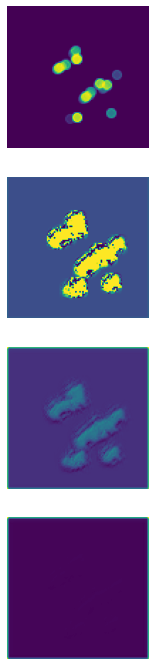

In [155]:
fig, ax, plt = model.extrapolateFromImagePath('../img/one_channel/','2007-06-06',3)

In [69]:
stats.describe(np.squeeze(predictions[1]).reshape(-1,1))

DescribeResult(nobs=10000, minmax=(array([0.], dtype=float32), array([1.], dtype=float32)), mean=array([0.35546863], dtype=float32), variance=array([0.07375627], dtype=float32), skewness=array([1.7618928], dtype=float32), kurtosis=array([1.4822044], dtype=float32))

In [145]:
prediction = model.predictions[1]
threshold = .5
print(prediction.shape)
#xy = np.zeros((prediction.shape[2],prediction.shape[3]))
xy = []

for x in range(prediction.shape[2]):
    for y in range(prediction.shape[3]):
        if prediction[0][0][x][y][0] > threshold:
            xy.append([x,y])
            
print(len(xy))
xy= np.array(xy)
xy.shape


(1, 1, 100, 100, 1)
1142


(1142, 2)

In [146]:
decoded_predictions = builder.model_decoder.predict(xy)

In [147]:
decoded_predictions.shape
decoded_predictions = builder.scaler.inverse_transform(decoded_predictions)

In [148]:
decoded_predictions_df = pd.DataFrame(decoded_predictions, columns=builder.columns_linear)

In [149]:
decoded_predictions_df 

,NBHC_x,STR,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,ACT,EFF,HEAT_AR,BASE,ACREAGE,REA_CD_encoded_x,REA_CD_encoded_y
0,3.302090e+06,-10774.839844,-3.994224,0.391835,3.163722,-0.070797,-3.548781,2026.334717,2013.343872,7745.150879,-835.139709,-10.348842,-2.546753,32.908661
1,3.964760e+06,-13101.528320,-5.524089,0.035885,3.553326,-0.580003,-4.560966,2031.286621,2011.341553,8607.271484,-1006.816711,-13.073524,-5.136884,43.323658
2,4.296094e+06,-14264.864258,-6.289047,-0.142107,3.748146,-0.834827,-5.067066,2033.763794,2010.339844,9038.097656,-1092.655273,-14.436507,-6.431940,48.531147
3,4.627428e+06,-15428.204102,-7.053914,-0.320047,3.942915,-1.088961,-5.573162,2036.239258,2009.338501,9468.593750,-1178.493652,-15.798480,-7.727008,53.738636
4,2.854342e+06,-9202.767578,-2.960554,0.632327,2.900548,0.273062,-2.864863,2022.987183,2014.695435,7163.572754,-719.142029,-8.507762,-0.796645,25.871521
5,4.842350e+06,-16182.792969,-7.550094,-0.435558,4.069217,-1.253972,-5.901433,2037.845459,2008.690186,9748.494141,-1234.172852,-16.682541,-8.567077,57.116482
6,5.173684e+06,-17346.142578,-8.315052,-0.613538,4.264016,-1.508743,-6.407540,2040.321167,2007.688232,10179.632812,-1320.011353,-18.045431,-9.862136,62.323990
7,1.743924e+06,-5304.019531,-0.397035,1.228783,2.247728,1.126233,-1.168758,2014.688843,2018.051270,5719.562500,-431.467529,-3.941725,3.543574,8.419387
8,2.075259e+06,-6467.357910,-1.161927,1.050806,2.442508,0.871621,-1.674855,2017.164917,2017.050415,6150.311523,-517.305969,-5.303882,2.248505,13.626888
9,2.406594e+06,-7630.701660,-1.926905,0.872833,2.637325,0.617010,-2.180953,2019.641235,2016.048462,6581.566406,-603.144714,-6.666681,0.953446,18.834396


In [150]:
decoded_predictions_df = rea_cd_autoencoder.decode_rea_cd_in_df(decoded_predictions_df)

In [151]:
decoded_predictions_df

,NBHC_x,STR,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,ACT,EFF,HEAT_AR,BASE,ACREAGE,REA_CD
0,3.302090e+06,-10774.839844,-3.994224,0.391835,3.163722,-0.070797,-3.548781,2026.334717,2013.343872,7745.150879,-835.139709,-10.348842,02
1,3.964760e+06,-13101.528320,-5.524089,0.035885,3.553326,-0.580003,-4.560966,2031.286621,2011.341553,8607.271484,-1006.816711,-13.073524,11
2,4.296094e+06,-14264.864258,-6.289047,-0.142107,3.748146,-0.834827,-5.067066,2033.763794,2010.339844,9038.097656,-1092.655273,-14.436507,11
3,4.627428e+06,-15428.204102,-7.053914,-0.320047,3.942915,-1.088961,-5.573162,2036.239258,2009.338501,9468.593750,-1178.493652,-15.798480,11
4,2.854342e+06,-9202.767578,-2.960554,0.632327,2.900548,0.273062,-2.864863,2022.987183,2014.695435,7163.572754,-719.142029,-8.507762,02
5,4.842350e+06,-16182.792969,-7.550094,-0.435558,4.069217,-1.253972,-5.901433,2037.845459,2008.690186,9748.494141,-1234.172852,-16.682541,11
6,5.173684e+06,-17346.142578,-8.315052,-0.613538,4.264016,-1.508743,-6.407540,2040.321167,2007.688232,10179.632812,-1320.011353,-18.045431,11
7,1.743924e+06,-5304.019531,-0.397035,1.228783,2.247728,1.126233,-1.168758,2014.688843,2018.051270,5719.562500,-431.467529,-3.941725,01
8,2.075259e+06,-6467.357910,-1.161927,1.050806,2.442508,0.871621,-1.674855,2017.164917,2017.050415,6150.311523,-517.305969,-5.303882,05
9,2.406594e+06,-7630.701660,-1.926905,0.872833,2.637325,0.617010,-2.180953,2019.641235,2016.048462,6581.566406,-603.144714,-6.666681,02


In [152]:
decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['tBEDS'] >= 0]
decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['tSTORIES'] >= 0]
decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['tBATHS'] >= 0]
decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['tUNITS'] >= 0]
decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['tBLDGS'] >= 0]
#decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['ACT'] >= 0]
#decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['EFF'] >= 0]
#decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['HEAT_AR'] >= 0]
#decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['BASE'] >= 0]
#decoded_predictions_df = decoded_predictions_df[ decoded_predictions_df['ACREAGE'] >= 0]

In [153]:
decoded_predictions_df.shape

(26, 13)

In [154]:
decoded_predictions_df

,NBHC_x,STR,tBEDS,tBATHS,tSTORIES,tUNITS,tBLDGS,ACT,EFF,HEAT_AR,BASE,ACREAGE,REA_CD
14,964839.87500,-2568.605957,1.401523,1.647272,1.789724,1.724651,0.021247,2008.866821,2020.404785,4706.320801,-229.631363,-0.738212,12
25,848426.93750,-2159.869873,1.670295,1.709792,1.721284,1.814164,0.199065,2007.996704,2020.756592,4554.907715,-199.472397,-0.259381,12
48,615600.12500,-1342.401978,2.207770,1.834835,1.584420,1.992977,0.554684,2006.257080,2021.459717,4252.042480,-139.154343,0.698007,12
49,946935.06250,-2505.734131,1.442883,1.656868,1.779192,1.738542,0.048591,2008.732788,2020.458984,4682.791504,-224.992676,-0.664058,12
61,499186.15625,-933.658264,2.476563,1.897390,1.515974,2.082542,0.732508,2005.386841,2021.811890,4100.667969,-108.995026,1.177022,12
62,830521.31250,-2097.002197,1.711646,1.719413,1.710775,1.827931,0.226412,2007.862427,2020.810547,4531.650391,-194.833496,-0.185227,12
77,400732.12500,-647.079163,2.336969,1.832642,1.615657,0.672697,0.850976,1967.121094,1980.269165,4764.063965,-83.820114,-3.147623,3A
78,714106.75000,-1688.258545,1.980378,1.781942,1.642323,1.917390,0.404227,2006.993164,2021.162354,4380.159668,-164.674271,0.293145,12
93,597693.81250,-1279.524536,2.249141,1.844467,1.573882,2.006797,0.582040,2006.122437,2021.513672,4228.746582,-134.515228,0.771977,12
94,929028.87500,-2442.872314,1.484193,1.666494,1.768704,1.752291,0.075946,2008.598755,2020.512695,4659.631836,-220.353912,-0.590456,12
